## TITANIC v2
DATASET: https://www.kaggle.com/datasets/yasserh/titanic-dataset 

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv("Titanic-Dataset.csv")


### Meaning of indexes
* Survived: 1-yes, 0-no
* Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp: No. of siblings / spouses aboard the Titanic
* Parch No. of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: price
* Embarked: port

In this notebook I would like to do predictions about survival.

In [166]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Prepreparing data

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are some categorical data, with which I'll need to deal. 

In [168]:
data.shape

(891, 12)

There is 891 samples and 12 features.

In [169]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This dataset has some missing values. We don't have information about the ages of 177 people, in 687 records we are missing data about cabin numbers and we don't have 2 values in Embarked column.


There is only 2 missing values in **Embarked**, so I will remove rows with missing values.

In [170]:
data.drop(data[(data["Embarked"].isnull())].index, inplace=True)

I will get rid of the **Cabin** column. I won't use it for prediction (This column does not add much when we have data such as class or fare)

In [171]:
data = data.drop(columns="Cabin")

There is a bigger problem with **Age** column, this column could be meaningful in the following predictions. So I can't just delete it.
I think that it could be interesting to predict these values from the rest of the data (without survival, because I will be predicting this column later)

In [172]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Right now I have all data except Age, which I will predict later.

##### Let's drop unnecessary columns.


I will drop also columns **Name** and **Ticket**. They are categorical and don't matter in our prediction.

In [173]:
data = data.drop(columns="Name")
data = data.drop(columns="Ticket")


I'll code sex numericaly as 0 or 1 instead of using "male" or "female".

In [174]:
from pandas import Categorical

data["Sex"] = Categorical(data["Sex"]).codes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int8   
 4   Age          712 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), int8(1), object(1)
memory usage: 63.4+ KB


There is one more important column in our data, which contain 3 different categorical values. It is **Embarked**. I'll create 3 new columns contains only values 0 and 1, where 1 means that the passenger boarded at the port.

In [175]:
from pandas import get_dummies

data = get_dummies(data=data, columns=["Embarked"])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


I will chceck correlation between my data using correlation map.

<AxesSubplot: >

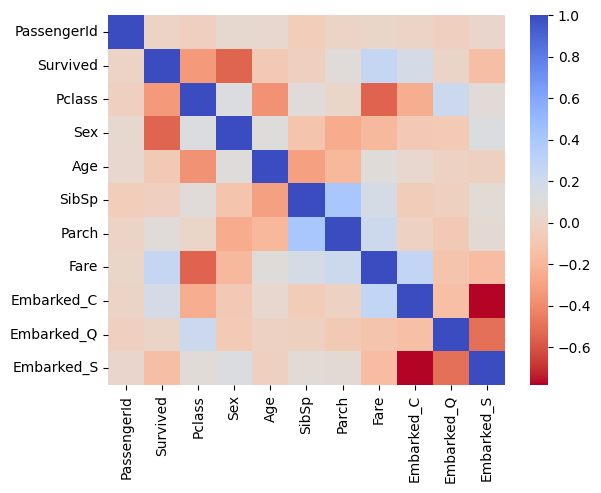

In [176]:
from seaborn import heatmap
heatmap(data.corr(), cmap='coolwarm_r')

On this plot we have correation level represented by color. Values 1 and -1 means high correlation. Values around 0 means low correlation.
I can see that **PassengerId** isn't aspecially corelated with rest of data, so I'll remove it from our dataset. 

In [177]:
data = data.drop(columns="PassengerId")

#### Scaling
I will scale data to values from range (0,1)

In [178]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

data_columns = data.columns
scaler = MinMaxScaler()
data = DataFrame(scaler.fit_transform(data))
data.columns = data_columns
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


#### Predicting age

Right now we have cleaned the data and finally, I can start to predict age values where they are missing.


From data I will take only this samples which have age value.

In [179]:
data_with_all_age_val = data.dropna(inplace=False, subset=["Age"])
data_with_all_age_val.shape

(712, 10)

Age is highly correlated with **SibSp** (No. of siblings / spouses aboard the Titanic), so let's try to predict it based on this column.

In [180]:
X = data_with_all_age_val["SibSp"]
y = data_with_all_age_val["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

I create a linear regression model.

Intercept: 0.39130596621407626
Coefficient: [-0.48444493]


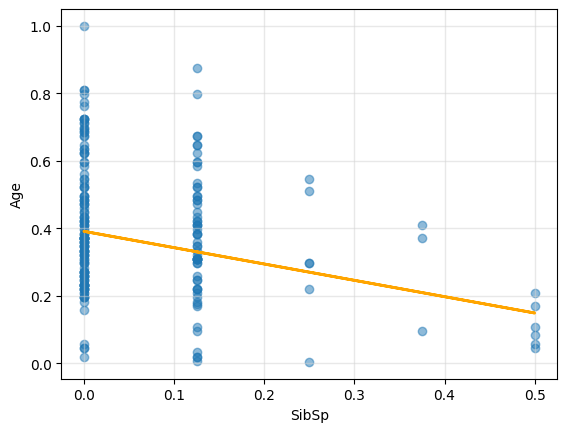

In [181]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

plt.grid(color='lightgray', linestyle='-', linewidth=1, alpha=0.5)
plt.scatter(X_test,y_test, alpha=0.5)
plt.xlabel("SibSp")
plt.ylabel("Age")
plt.plot(X_test, predict, color="orange", linewidth=2)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

The orange line represents our model. Based on this line we can predict what age is person using the number of siblings or spouses aboard.

On the plot, we have scaled values so nice to have in mind that: 
* Age is in the range 0-80 years
* SibSp could be from the range 0-4

#### Model Quality
I will calculate **score** of model, which means *Coefficient of determination of the prediction*, the best possible score is 1.0
and **MSE** - *mean squared error regression loss*, the best value is 0.0.

In [182]:
score = model.score(X_train, y_train) 
MSE = mean_squared_error(y_test, predict)

print("Score: ", score)
print("MSE: ", MSE)

Score:  0.10623985456116003
MSE:  0.033601724816007345


MSE is nice, quite near zero value. But the score is low, we can see even on the plot that our model won't have good accuracy. But in this case, I think that it is enough to just have a good average age, to just fill gaps.

#### Creating higher order polynomial regression models.

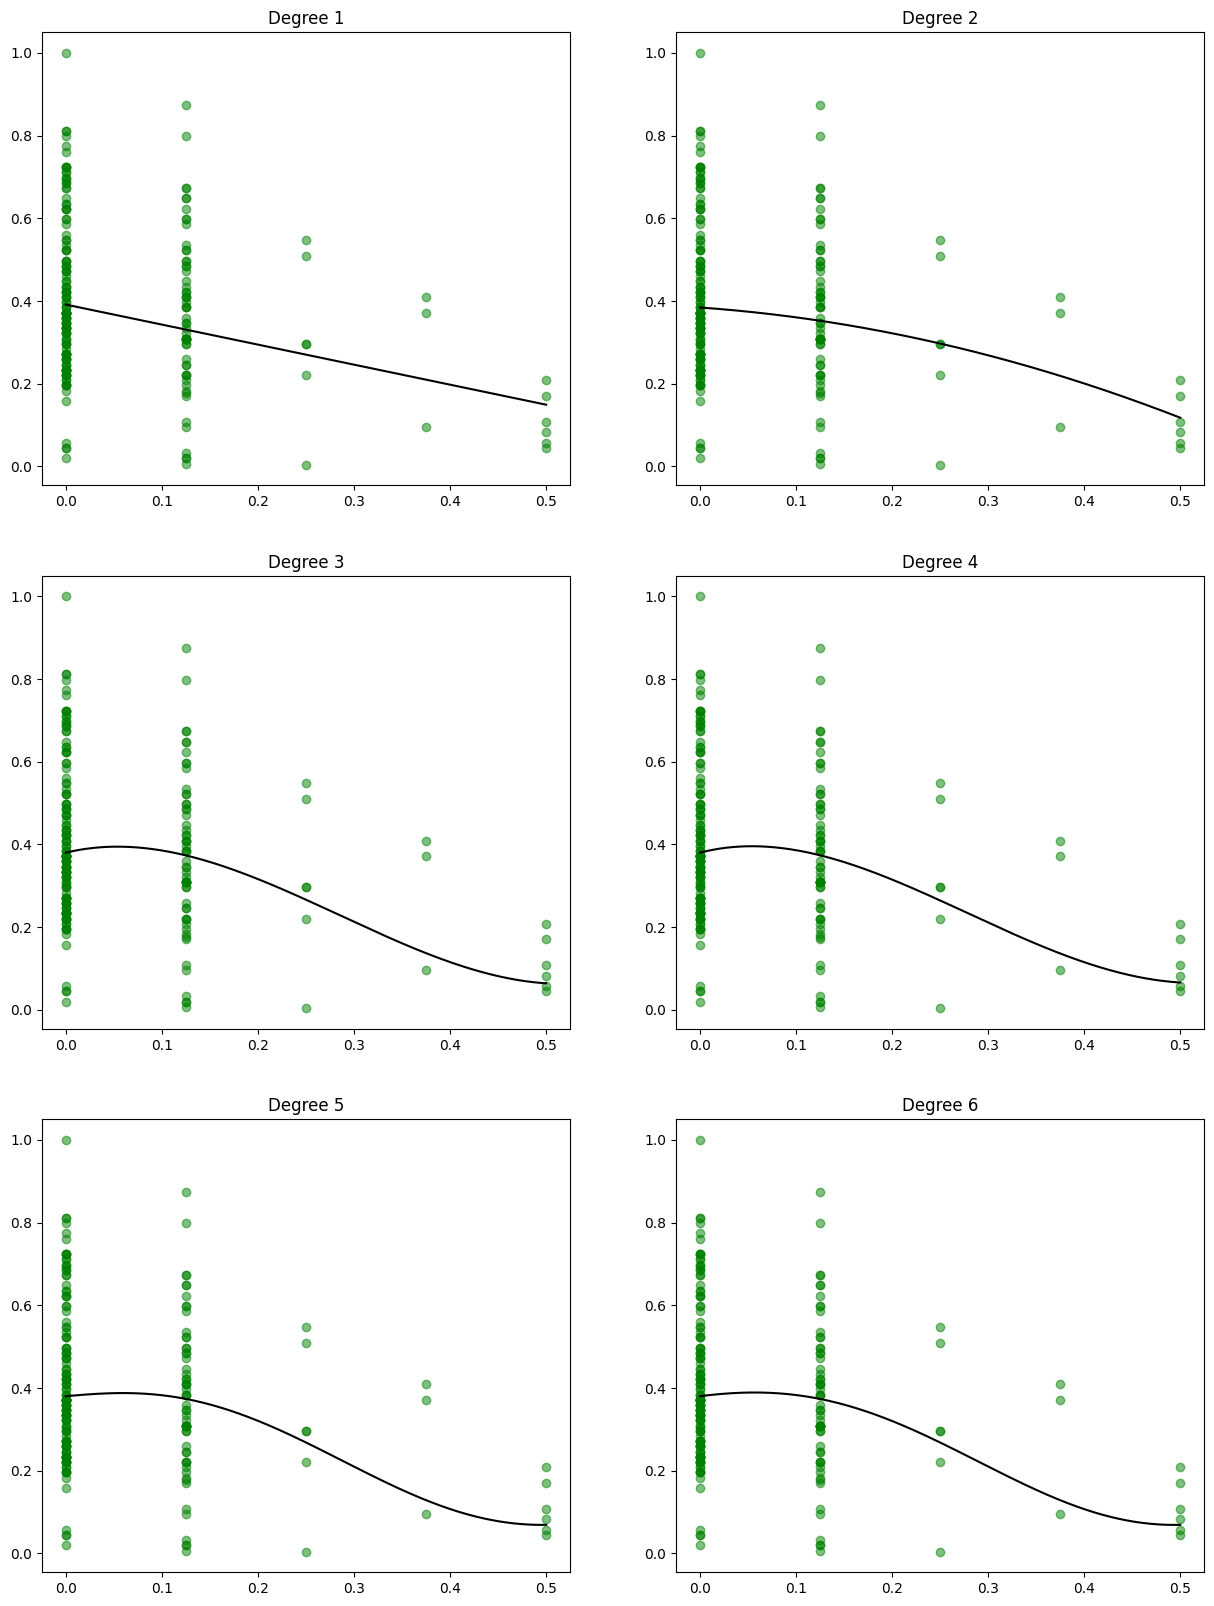

In [183]:
figure, axis = plt.subplots(3,2, figsize=(15,20))
row = 0
col = 0
error=[]
score=[]

lr=LinearRegression()


for order in range(1,7):        
    poly = PolynomialFeatures(order, include_bias = False)    
    X_order = poly.fit_transform(X_train)        
  
    lr.fit(X_order,y_train)
    x_predict = np.linspace(0,0.5,1000)
    y_predict = lr.predict(poly.transform(x_predict.reshape(-1,1)))


    #ploting
    axis[row,col].set_title('Degree ' + str(order))
    axis[row,col].scatter(X_test,y_test, color="green", alpha=0.5)
    axis[row,col].plot(x_predict, y_predict, color='black')
    
    #finding position
    col = (col+1)%2
    if (order % 2 == 0):
        row += 1

    #error
    error.append(mean_squared_error(y_train, lr.predict(X_order)))
    score.append(lr.score(X_order,y_train))


Score:

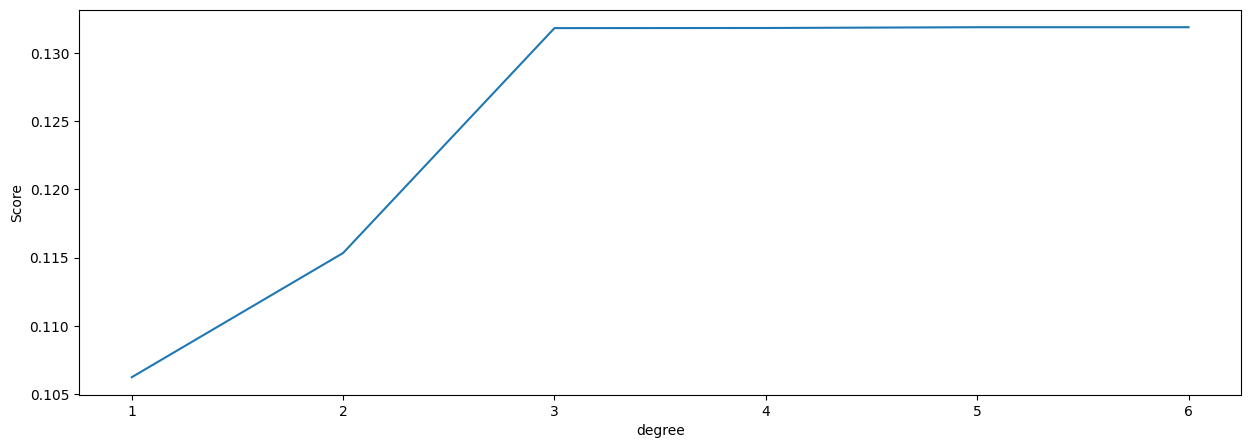

In [184]:
plt.figure(figsize=(15,5))
plt.xlabel("degree")
plt.ylabel("Score")
plt.plot(range(1,7),score)

MSE:

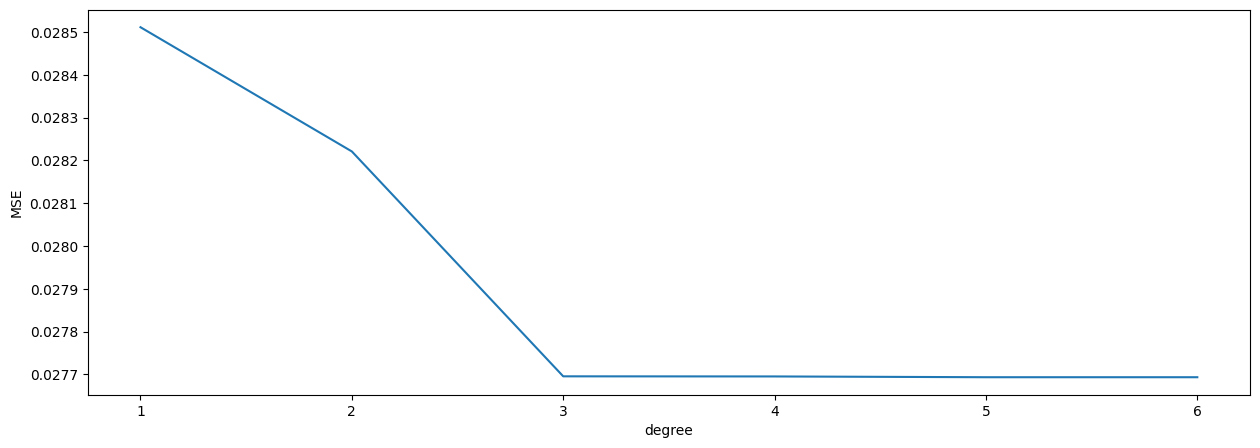

In [185]:
plt.figure(figsize=(15,5))
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(range(1,7),error)

From these plots, We can conclude, that the 3rd degree of the polynomial is the best fitted.

#### Using more features to predict Age

We don't have to limit ourselves to one column when predicting age. I will use the other columns but I will omit the Survived column because I will want to predict it later in the notebook and I don't want it to affect my further actions in any way.

In [186]:
data_with_all_age_val.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


I will do predctions using this features:
'Pclass' 'Sex' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q' 'Embarked_S'

My X_test will be records where age is null.
I'm going to use a 3rd-degree polynomial. Because it previously gave the best results.

In [187]:

X_train = data_with_all_age_val.drop(inplace=False, columns="Age").drop(columns="Survived")
y_train = data_with_all_age_val["Age"]
X_test = data[data["Age"].isna()].drop(inplace=False, columns=["Age"]).drop(columns="Survived") #records where age is null


poly = PolynomialFeatures(3, include_bias = False)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)


data.loc[data["Age"].isna(), "Age"] = y_pred

data.isnull().sum()



Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

I put predictions where age was null and now, I don't have any missing values. 

Now when I have good prepared data, I would like to do one more prediction, about survival. 

In [188]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


From the correlation matrix results that survival is the most correlated with column gender, so firstly I'll do predictions based only on **Sex** column.

In [189]:
X = data["Sex"]
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)


print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print("Mean squared error equals: {0}".format(mean_squared_error(predict, y_test)))
print("score: ", model.score(X_train, y_train))


Intercept: 0.7383177570093462
Coefficient: [-0.56184717]
Mean squared error equals: 0.17914173983771903
score:  0.30570069555656465


In [190]:
order_range = 9

In [191]:
lr=LinearRegression()
error=[]
score=[]

for order in range(1,order_range):  
    poly = PolynomialFeatures(order, include_bias = False)    
    X_order = poly.fit_transform(X_train)        

    lr.fit(X_order,y_train)
    x_predict = np.linspace(0,1,1000)
    y_predict = lr.predict(poly.transform(x_predict.reshape(-1,1)))

    error.append(mean_squared_error(y_train, lr.predict(X_order)))
    score.append(lr.score(X_order,y_train))




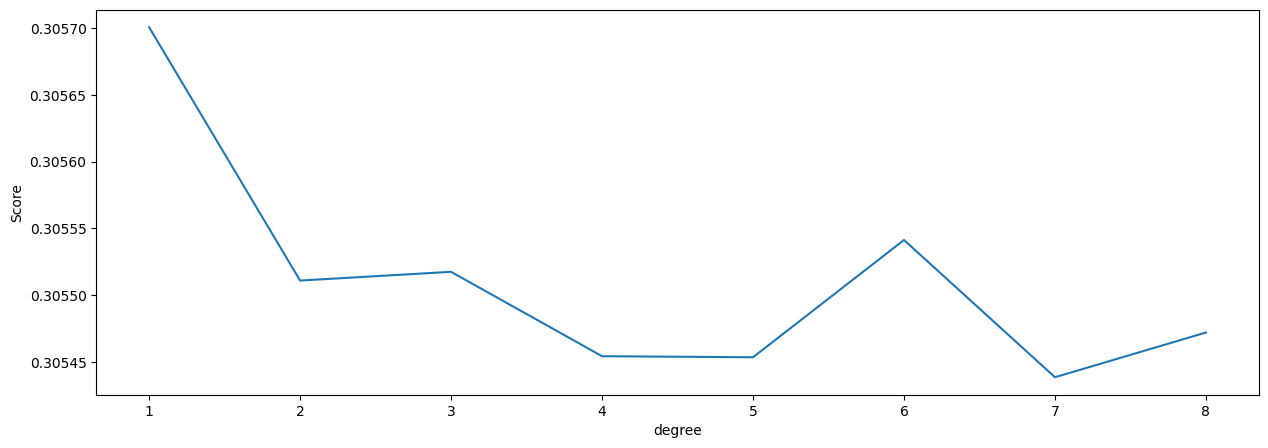

In [192]:
plt.figure(figsize=(15,5))
plt.xlabel("degree")
plt.ylabel("Score")
plt.plot(range(1,order_range),score)


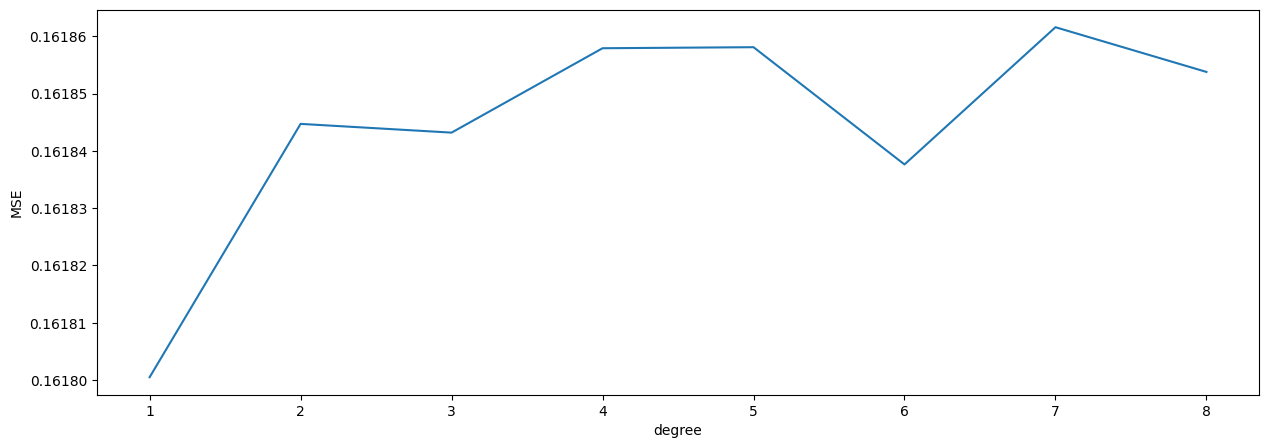

In [193]:
plt.figure(figsize=(15,5))
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(range(1,order_range),error)

We can see that the best model was 1st one.

Here I'll use more features to predict survival.

In [194]:
X = data.drop(inplace=False, columns="Survived")
#[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]]
y = data["Survived"]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Mean squared error equals: {0}".format(mean_squared_error(predict, y_test)))
print("score: ", model.score(X_train, y_train))



Mean squared error equals: 0.18838788361827355
score:  0.38530998431676355


Here MSE and score are bigger than using only gender. It's nice when the score is rising, but not when MSE is bigger.

I will check if a different set of features will give better results.

In [195]:
X = data.drop(inplace=False, columns=["Survived", "Parch"])
#[["Pclass", "Sex", "Age", "SibSp", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]]
y = data["Survived"]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Mean squared error equals: {0}".format(mean_squared_error(predict, y_test)))
print("score: ", model.score(X_train, y_train))

Mean squared error equals: 0.17241430249011216
score:  0.4297396575561807


It's much better without the **Parch** column (I deleted this one because it isn't correlated with survival when you look at the correlation matrix)

In [196]:
X = data.drop(inplace=False, columns=["Survived", "Parch", "Embarked_C","Embarked_Q","SibSp"])
#[["Pclass", "Sex", , "Age", "Fare","Embarked_S"]]
y = data["Survived"]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Mean squared error equals: {0}".format(mean_squared_error(predict, y_test)))
print("score: ", model.score(X_train, y_train))

Mean squared error equals: 0.16914238956778088
score:  0.40845566687649826


When I deleted more features MSE dropped, but the score is now a little lower than before.

## Part 2

In [197]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


In [198]:
X = data.drop(columns=['Survived']).values
y = data.Survived.values

Data are already scaled, so I can just split them into testing and training sets. 30% for test data and the rest for training.

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Linear Regression

In [200]:
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_train)
linear_score=r2_score(y_train, pred)
MSE_train=mean_squared_error(y_train,pred)

pred_test = model.predict(X_test)
linear_test_score=r2_score(y_test, pred_test)
MSE_test=mean_squared_error(y_test,pred_test)

print('Train')
print("score: ", linear_score)
print("MSE: ", MSE_train)
print('\nTest')
print("score: ", linear_test_score)
print("MSE: ", MSE_test)

Train
score:  0.3606870063164881
MSE:  0.15126186015138288

Test
score:  0.4733598096038224
MSE:  0.12385710884122812


### Lasso
Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. 

In [201]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
lasso_cv.fit(X_train, y_train)

/home/klaud/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, normalize=True)

In [202]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.00016211807592405206)

In [203]:
lasso_train_score=lasso.score(X_train, y_train)
print("Train score: ",lasso_train_score)
lasso_test_score=lasso.score(X_test, y_test)
print("Test score: ",lasso_test_score)


Train score:  0.36072351982878426
Test score:  0.4750034015373511


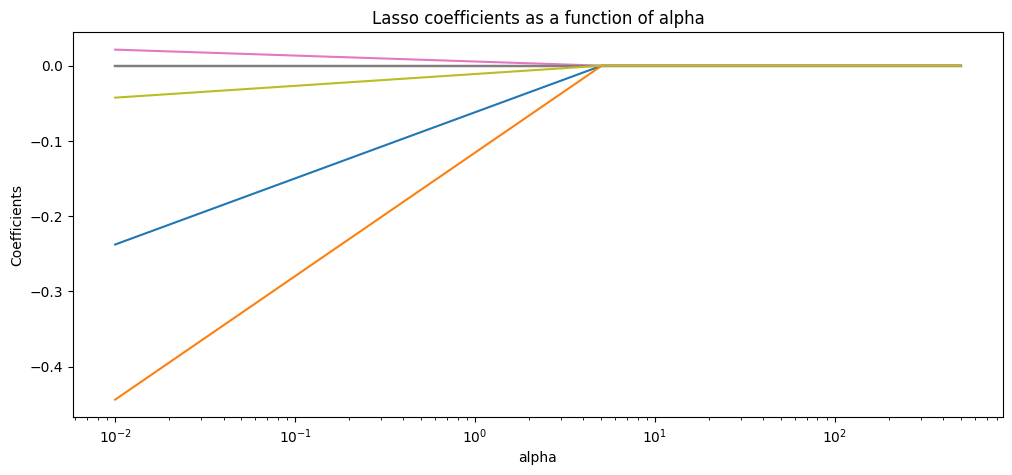

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=1000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.subplots(figsize= (12, 5))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha');

### Ridge
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. 

In [205]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

/home/klaud/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/klaud/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



RidgeCV(alphas=array([2.09123601, 9.63904167, 3.81403397, 4.72420381, 0.77733526,
       7.99859636, 8.56874611, 0.97995367, 6.52750847, 6.27660804,
       3.52474809, 8.64819634, 6.21545755, 1.86708018, 0.12124058,
       8.12770392, 5.18905315, 2.78350608, 1.90484346, 3.50515189,
       5.33840596, 6.50305808, 8.34295377, 3.18806089, 1.24757477,
       8.85235029, 6.90263324, 3.20325602, 7.08654393, 4.66458048,
       1.93945133, 8.95363768, 4.94362953, 2.92497682, 5.45119449,
       9.756992  , 2.24144411, 2.93704338, 8.44676981, 8.88197588,
       0.54943429, 1.20193588, 1.24845983, 9.53618878, 9.04641753,
       2.57102589, 6.74582596, 3.59424663, 6.75747991, 8.85689837]),
        cv=10, normalize=True)

In [206]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.12124058148133998)

In [207]:
ridge_train_score=ridge.score(X_train, y_train)
print("Train score: ",ridge_train_score)
ridge_test_score=ridge.score(X_test, y_test)
print("Test score: ",ridge_test_score)

Train score:  0.3607763971829897
Test score:  0.4739514169793517


### Summary

In [208]:
print("Linear: ", linear_test_score)
print("Lasso: ", lasso_test_score)
print("Ridge: ", ridge_test_score)


Linear:  0.4733598096038224
Lasso:  0.4750034015373511
Ridge:  0.4739514169793517


We can see that the results are almost the same so the linear model was ok and I didn't need to use additional methods.

### KNN - Regression
Is based on k-nearest neighbours.

In [209]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    
    train_accuracy[i] = knn_model.score(X_train, y_train)
    test_accuracy[i] = knn_model.score(X_test, y_test) 

Let's check what number of neighbours is the best.

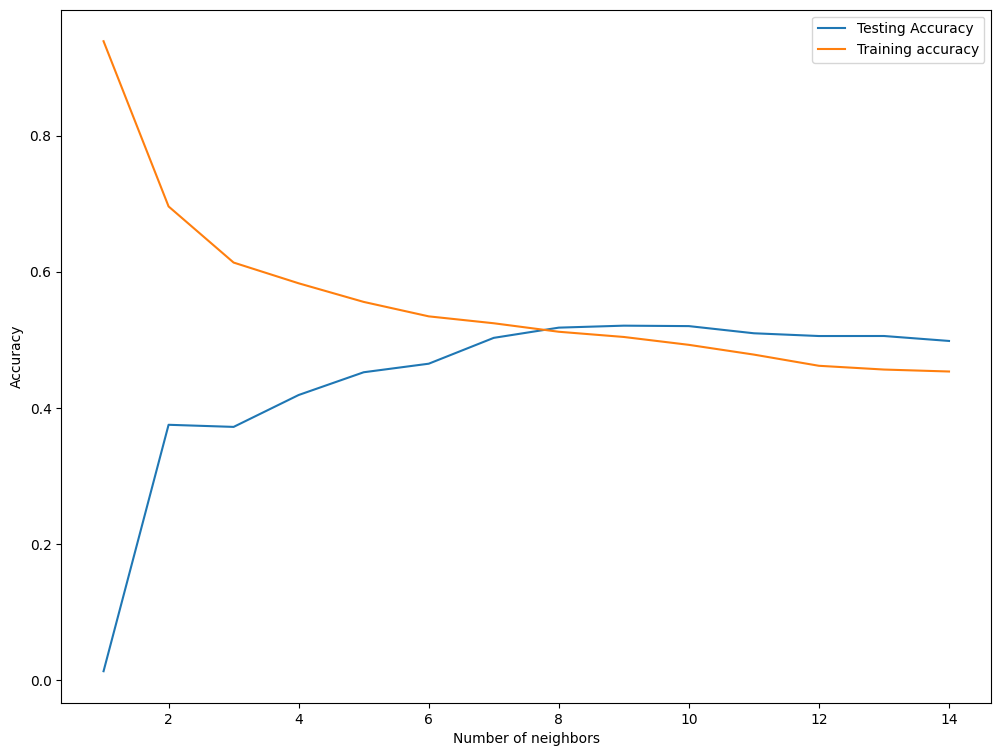

Max test score 52.067455741558064 % for number of neighbours equal 9


In [210]:
plt.subplots(figsize= (12, 9))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
max_test_score = max(test_accuracy)
test_scores_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_score]
best_neighbours_num = list(map(lambda x: x+1, test_scores_ind))[0]
print('Max test score {} % for number of neighbours equal {}'.format(max_test_score*100,best_neighbours_num))

In [211]:
knn_model = KNeighborsRegressor(n_neighbors=best_neighbours_num).fit(X_train, y_train)

score_knn = knn_model.score(X_test, y_test)
print("Test score: ", score_knn)

Test score:  0.5206745574155807


In [212]:
print("Linear: ", linear_test_score)
print("KNN: ", score_knn)

Linear:  0.4733598096038224
KNN:  0.5206745574155807


For KNN regression I received the best result from all. But it's still just a slightly better estimator than a coin flip.